<a href="https://colab.research.google.com/github/sradhass88/Virtual_Competition/blob/main/SRADHA_S_VIRTUAL_COMPETITION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# Load training and test datasets
train_df = pd.read_csv('/content/train_ctrUa4K.csv')
test_df = pd.read_csv('/content/test_lAUu6dG.csv')
# Print first five rows of train data frame.
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [176]:
# Print first five rows of test data frame
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


 Exploratory Data Analysis

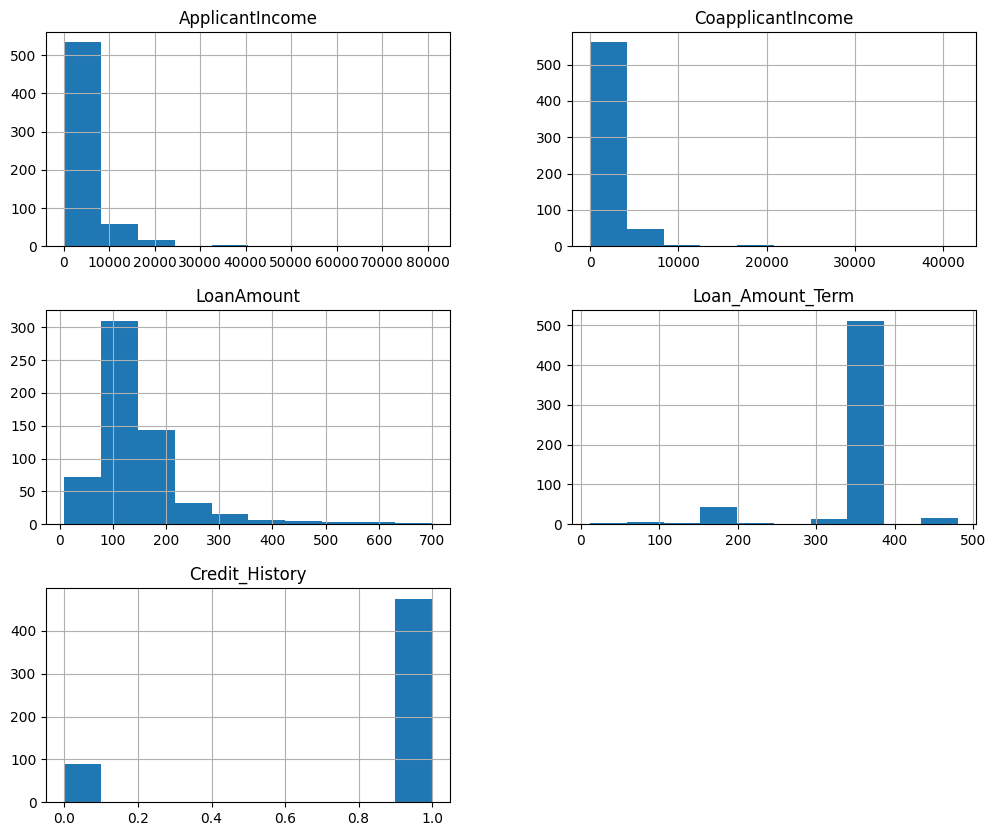

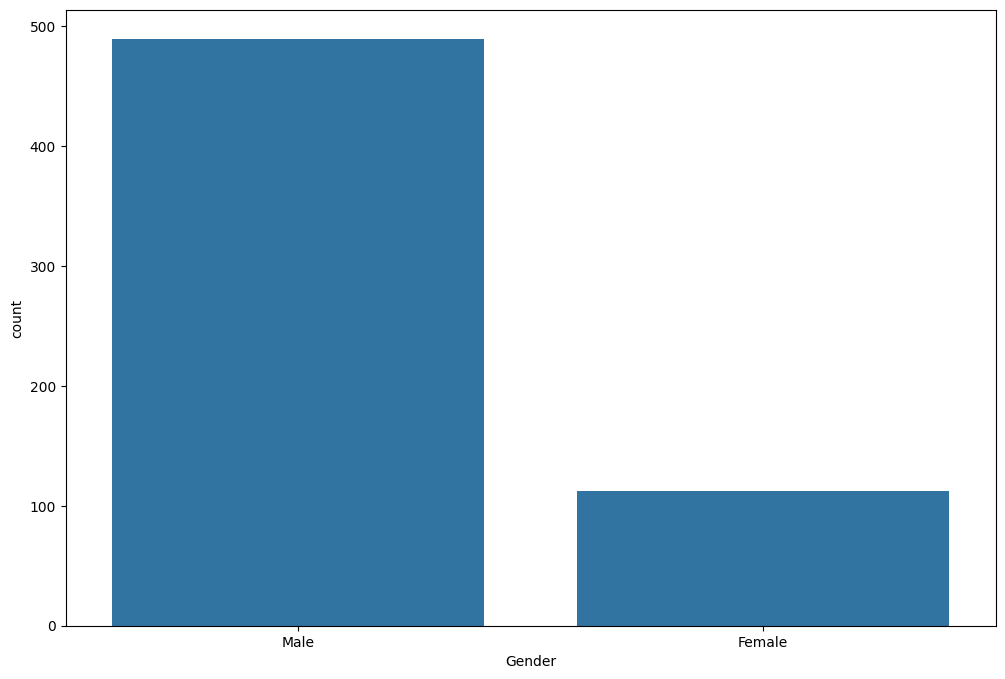

In [177]:
# histograms for numerical features
train_df.hist(figsize=(12, 10))
plt.show()

# Count plots for categorical features
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='Gender')
plt.show()

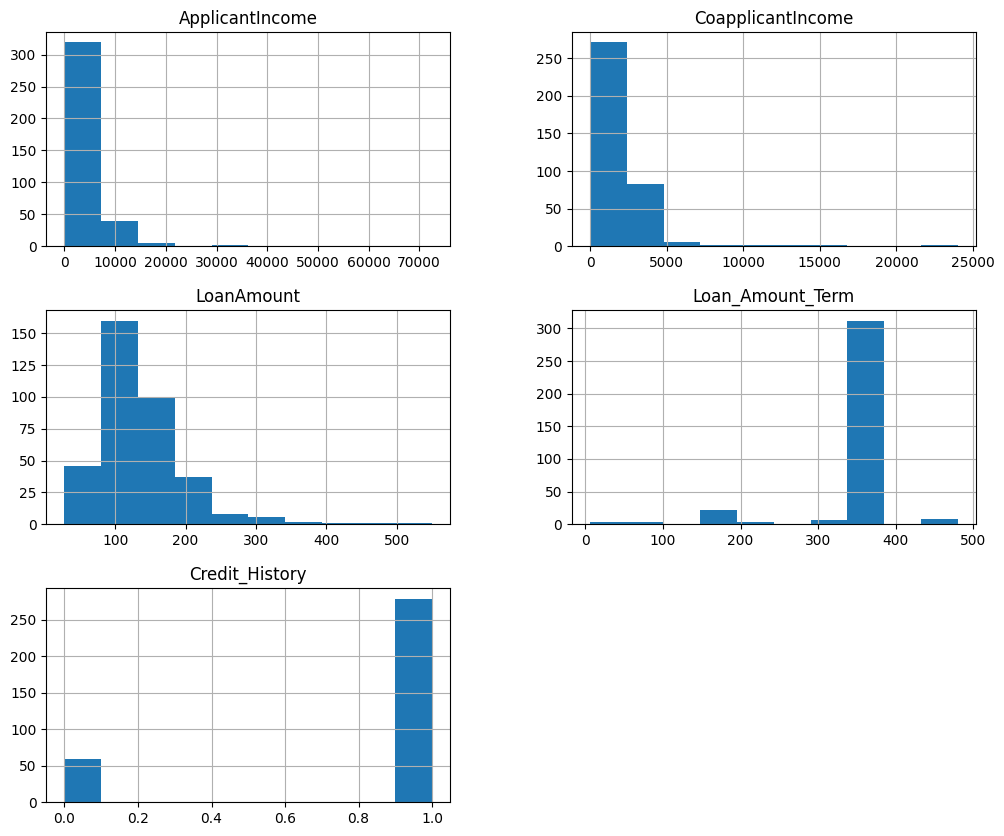

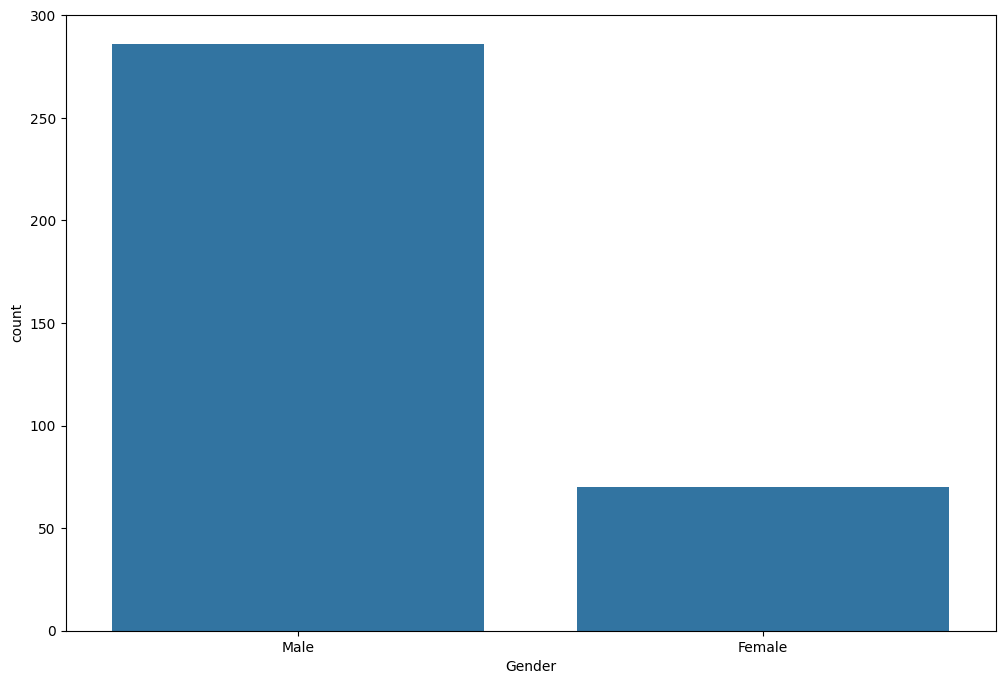

In [178]:
# histograms for numerical features
test_df.hist(figsize=(12, 10))
plt.show()

# Count plots for categorical features
plt.figure(figsize=(12, 8))
sns.countplot(data=test_df, x='Gender')
plt.show()

DATA PREPROCESSING

In [179]:
# finding missing values
train_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [180]:
test_df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


Handle missing values in both training and test datasets separately.


In [181]:
# to fill the missing values in Gender column
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)

# to fill the missing values in Married column
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)

# to fill the missing values in Dependents column
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)

# Fill missing values in 'Self_Employed' column with mode
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)

# Fill missing values in 'LoanAmount' column with median
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)

# Fill missing values in 'Loan_Amount_Term' column with the mean
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean(), inplace=True)
 # Fill missing values in credit history column
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

In [182]:
train_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [183]:
test_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [184]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure test set has the same columns as training set
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Encode target variable
label_encoder = LabelEncoder()
train_df['Loan_Status'] = label_encoder.fit_transform(train_df['Loan_Status'])

In [185]:
train_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,True
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,True


In [186]:
test_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0,110.0,360.0,1.0,0,True,True,False,False,False,True
1,LP001022,1,3076,1500,126.0,360.0,1.0,0,True,True,False,False,False,True
2,LP001031,2,5000,1800,208.0,360.0,1.0,0,True,True,False,False,False,True
3,LP001035,2,2340,2546,100.0,360.0,1.0,0,True,True,False,False,False,True
4,LP001051,0,3276,0,78.0,360.0,1.0,0,True,False,True,False,False,True


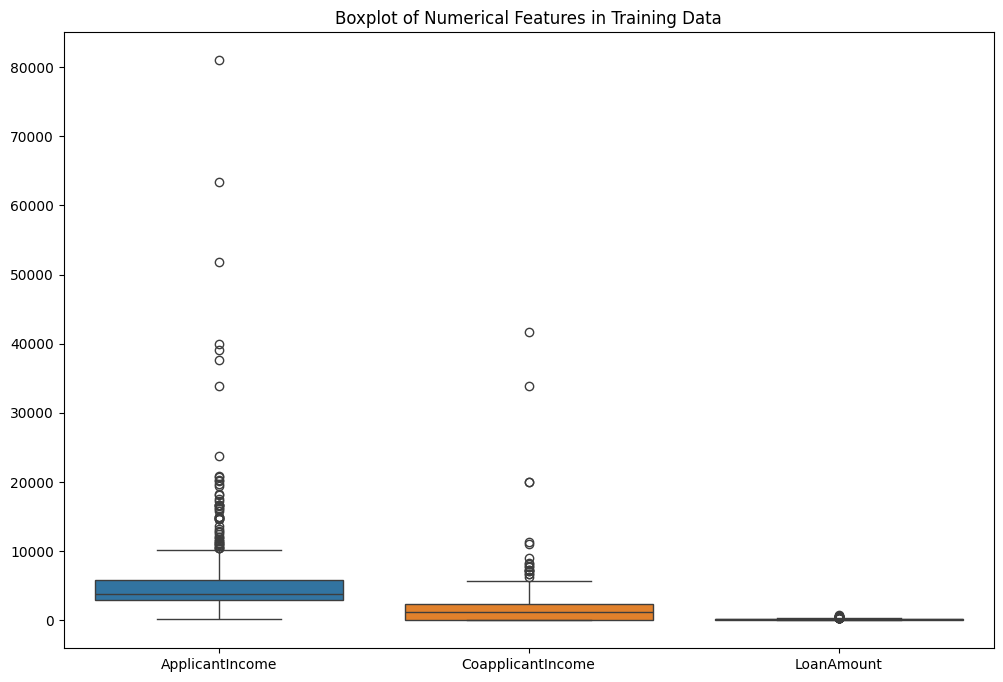

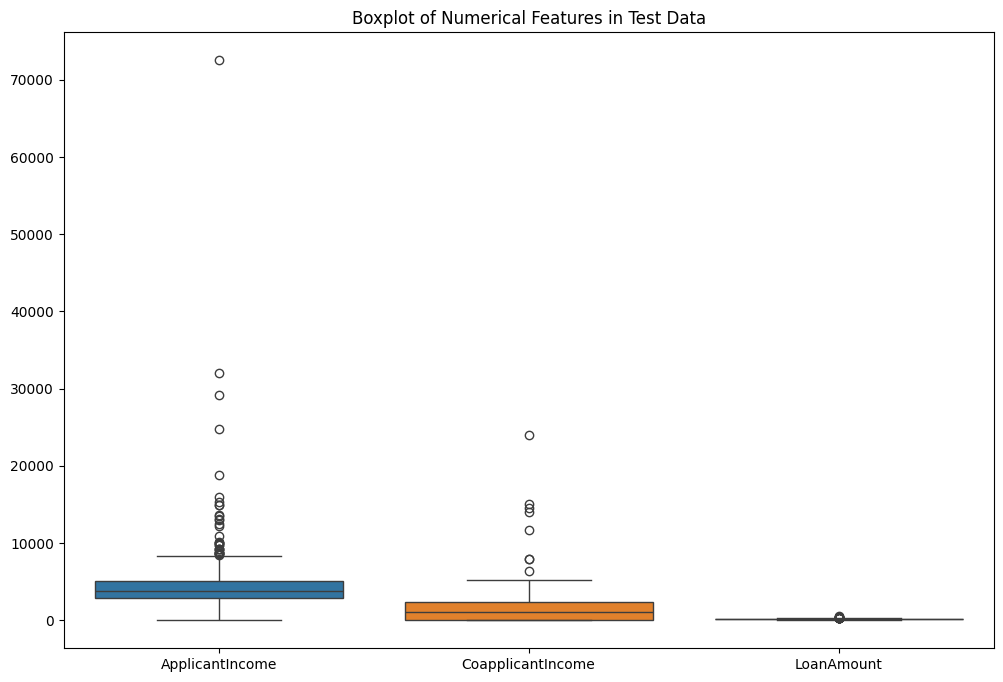

In [187]:
# Plot boxplots for numerical features in the training dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot of Numerical Features in Training Data')
plt.show()

# Plot boxplots for numerical features in the test dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot of Numerical Features in Test Data')
plt.show()

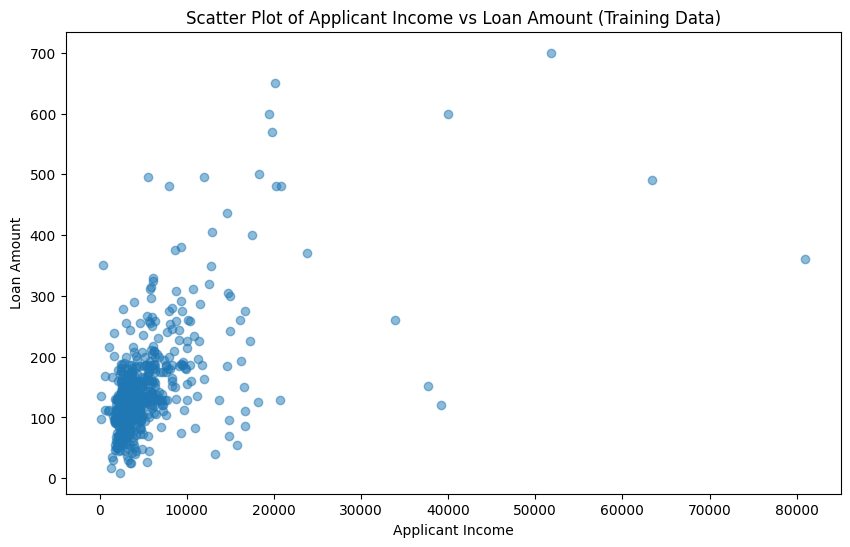

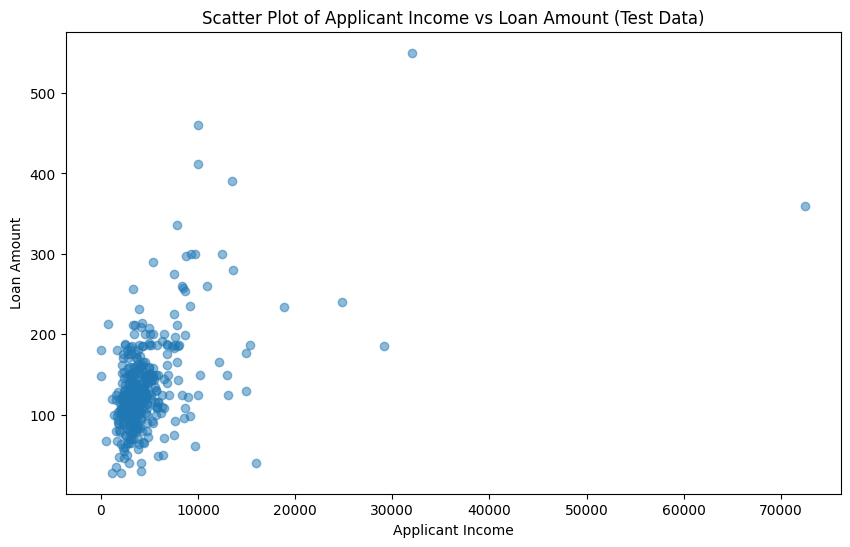

In [188]:
# Scatter plot for Applicant Income vs Loan Amount in training data
plt.figure(figsize=(10, 6))
plt.scatter(train_df['ApplicantIncome'], train_df['LoanAmount'], alpha=0.5)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Applicant Income vs Loan Amount (Training Data)')
plt.show()

# Scatter plot for Applicant Income vs Loan Amount in test data
plt.figure(figsize=(10, 6))
plt.scatter(test_df['ApplicantIncome'], test_df['LoanAmount'], alpha=0.5)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Applicant Income vs Loan Amount (Test Data)')
plt.show()

In [189]:
outlier_checking =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
Q1 = test_df[outlier_checking].quantile(0.25)
Q3 = test_df[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = test_df[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = test_df[outlier_checking]>(Q3 + 1.5*IQR)

#clip the outliers
test_df[outlier_checking] = test_df[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

In [190]:
outlier_checking =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']
Q1 = train_df[outlier_checking].quantile(0.25)
Q3 = train_df[outlier_checking].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = train_df[outlier_checking]<(Q1-1.5*IQR)
outliers_upper = train_df[outlier_checking]>(Q3 + 1.5*IQR)

#clip the outliers
train_df[outlier_checking] = train_df[outlier_checking].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

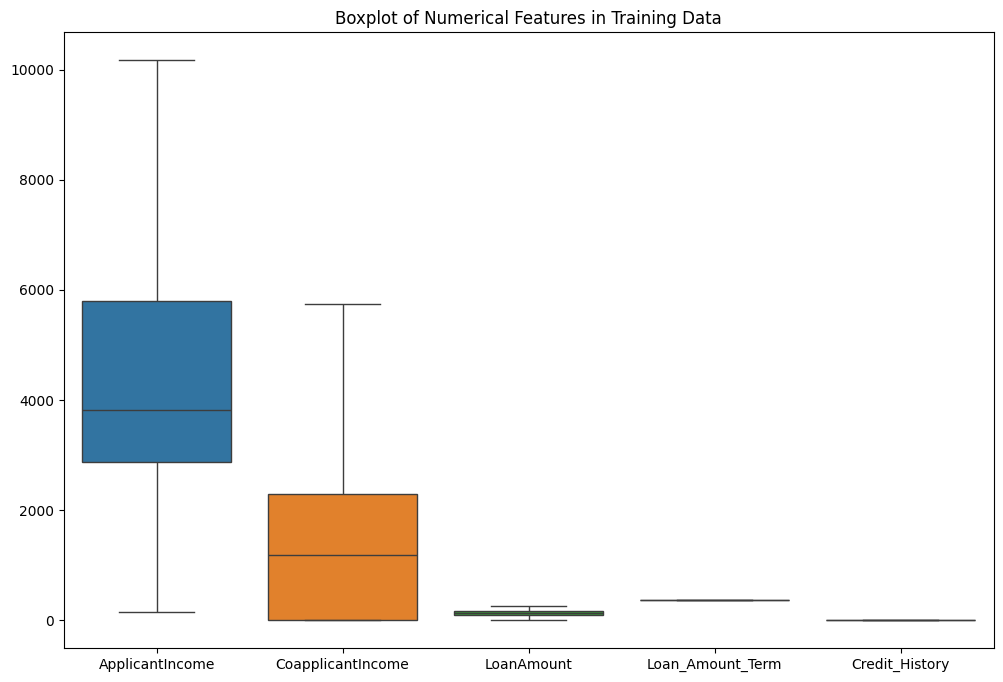

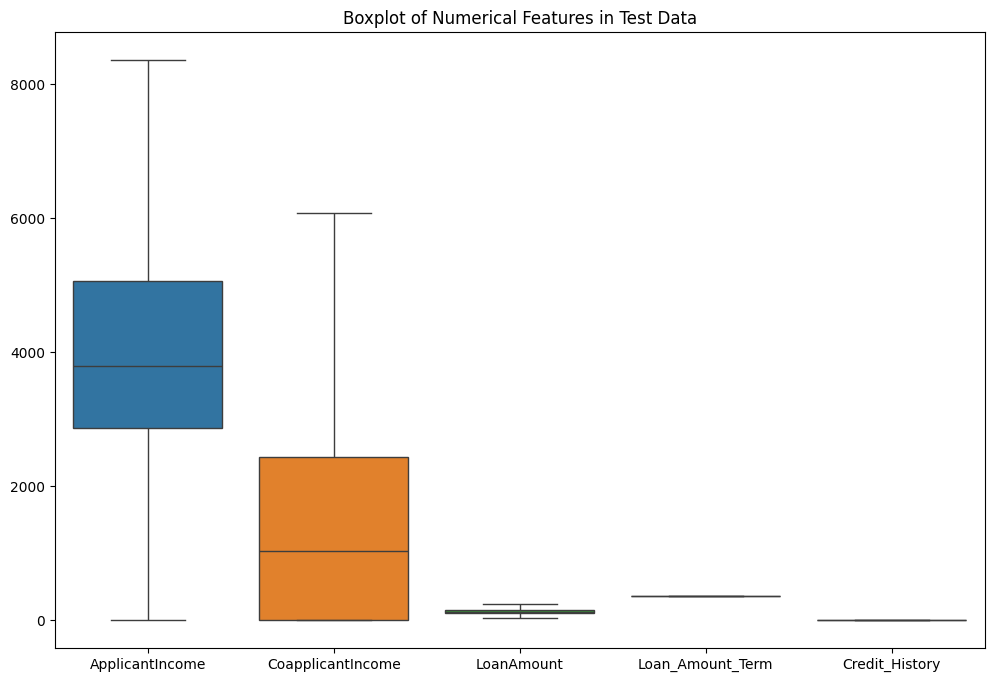

In [191]:
# Plot boxplots for numerical features in the training dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])
plt.title('Boxplot of Numerical Features in Training Data')
plt.show()

# Plot boxplots for numerical features in the test dataset
plt.figure(figsize=(12, 8))
sns.boxplot(data=test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])
plt.title('Boxplot of Numerical Features in Test Data')
plt.show()

Feature and Target Preparation

In [192]:
# Define features and target
X_train = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train_df['Loan_Status']

# Prepare test data - Make sure to drop 'Loan_Status' here as well
X_test = test_df.drop(['Loan_ID', 'Loan_Status'], axis=1)

SCALING

In [193]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and encode non-numerical values
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check if column is of object type (likely string)
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])  # Use the same encoder for test data

# Now proceed with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [195]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [196]:
 # Split training data for validation
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train and evaluate models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_split, y_train_split)
    y_pred = clf.predict(X_valid_split)
    accuracy = accuracy_score(y_valid_split, y_pred)
    results[name] = accuracy
    print(f'{name}:\n', classification_report(y_valid_split, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.50      0.02      0.04        43
           1       0.65      0.99      0.79        80

    accuracy                           0.65       123
   macro avg       0.58      0.51      0.42       123
weighted avg       0.60      0.65      0.53       123

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.32      0.19      0.24        43
           1       0.64      0.79      0.71        80

    accuracy                           0.58       123
   macro avg       0.48      0.49      0.47       123
weighted avg       0.53      0.58      0.54       123

Decision Tree:
               precision    recall  f1-score   support

           0       0.34      0.30      0.32        43
           1       0.65      0.69      0.67        80

    accuracy                           0.55       123
   macro avg       0.49      0.49      0.49       123
weighted avg  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
# Print model performance as pe the accuracy found
print("Model Performance:")
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

Model Performance:
Logistic Regression: 0.6504
K-Nearest Neighbors: 0.5772
Decision Tree: 0.5528
Random Forest: 0.6341
Support Vector Machine: 0.6504


In [198]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.6803339517625233


In [199]:

# Assume best_model is the model selected after fine-tuning
best_model = RandomForestClassifier(**grid_search.best_params_)
best_model.fit(X_train_scaled, y_train)

# Predict on test data
y_test_pred = best_model.predict(X_test_scaled)
# Define the mapping dictionary
mapping_dict = {0: 'N', 1: 'Y'}

 # Assume `y_test_pred` is your array of predictions
# Convert numerical predictions to 'Y'/'N' using the mapping dictionary
predicted_status = [mapping_dict[pred] for pred in y_test_pred]

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': predicted_status  # Convert numerical predictions back to 'Y'/'N'
})

# Save to CSV
submission.to_csv('loan_eligibility_predictions.csv', index=False)